In [1]:
# Imports
import os as os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

# image filters
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import gaussian, sobel, gabor
from skimage.feature import canny

1) Dataset \
\
https://www.kaggle.com/datasets/jangedoo/utkface-new

2) Reading in the data

In [3]:
def detect_faces(image):
    face_cascade = cv.CascadeClassifier(r"C:\Users\Bartus\source\repos\machinelearing\test\ML")
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image

def choose_data_source():
    while True:
        choice = input("Wybierz źródło danych (k - kamera, o - obraz, f - film, q - wyjście): ")
        if choice == 'k':
            # Źródło danych: kamera
            cap = cv.VideoCapture(0)
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                frame_with_faces = detect_faces(frame)
                cv.imshow('Face Detection', frame_with_faces)
                if cv.waitKey(1) & 0xFF == ord('q'):
                    break
            cap.release()
            cv.destroyAllWindows()
        elif choice == 'o':
            # Źródło danych: obraz
            image_path = input("Podaj ścieżkę do obrazu: ")
            image = cv.imread(image_path)
            if image is not None:
                image_with_faces = detect_faces(image)
                cv.namedWindow('Face Detection', cv.WINDOW_NORMAL)
                cv.imshow('Face Detection', image_with_faces)
                cv.waitKey(0)
                cv.destroyAllWindows()
            else:
                print("Nie można odczytać obrazu.")
        elif choice == 'f':
            # Źródło danych: film
            video_path = input("Podaj ścieżkę do filmu: ")
            cap = cv.VideoCapture(video_path)
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                frame_with_faces = detect_faces(frame)
                cv.namedWindow('Face Detection', cv.WINDOW_NORMAL)  # Ustalenie rozmiaru okna
                cv.imshow('Face Detection', frame_with_faces)
                if cv.waitKey(1) & 0xFF == ord('q'):
                    break
            cap.release()
            cv.destroyAllWindows()
        elif choice == 'q':
            break
        else:
            print("Nieprawidłowy wybór. Wybierz 'k', 'o', 'f' lub 'q'.")

if __name__ == "__main__":
    choose_data_source()

Nieprawidłowy wybór. Wybierz 'k', 'o', 'f' lub 'q'.
Nieprawidłowy wybór. Wybierz 'k', 'o', 'f' lub 'q'.
Nieprawidłowy wybór. Wybierz 'k', 'o', 'f' lub 'q'.
Nieprawidłowy wybór. Wybierz 'k', 'o', 'f' lub 'q'.
Nieprawidłowy wybór. Wybierz 'k', 'o', 'f' lub 'q'.
Nieprawidłowy wybór. Wybierz 'k', 'o', 'f' lub 'q'.


KeyboardInterrupt: Interrupted by user

3) Filters

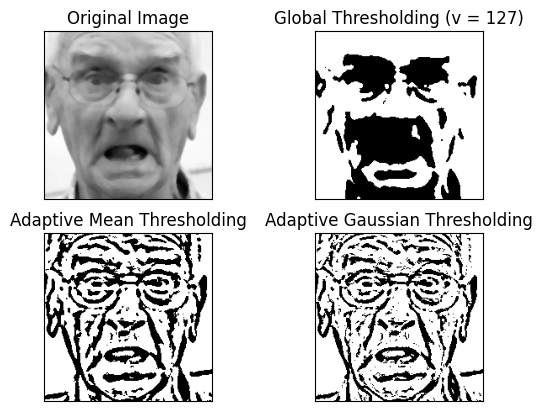

In [5]:
# Tresholding filters
img = cv.imread('./ds/90_0_0_20170111210545876.jpg.chip.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [4]:
def give_col_image(path):
    img = cv.imread(path)
    col_img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
    
    return col_img

In [5]:
def give_gray_image(col_img):
    gray_img = cv.cvtColor(col_img, cv.COLOR_BGR2GRAY)
    
    return gray_img

In [6]:
def give_gaussian_image(gray_img):
    gaussian_img = gaussian(gray_img, sigma=4)
    
    return gaussian_img

In [7]:
def give_gabor_image(gray_img):

    ksize = 5
    sigma = 0.5
    theta = 1*np.pi/4
    lamda = 1*np.pi/4
    gamma = 0.8
    phi = 0

    gabor_kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv.CV_32F)
    gabor_img = cv.filter2D(gray_img, cv.CV_8UC3, gabor_kernel)
    
    return gabor_img

In [8]:
def give_entropy_image(gray_img):
    entropy_img = entropy(gray_img, disk(5))
    
    return entropy_img

In [9]:
def give_sobel_image(gray_img):
    sobel_img = sobel(gray_img)
    
    return sobel_img

In [10]:
def give_canny_image(gray_img):
    canny_img = canny(gray_img, sigma=0.9)
    
    return canny_img

Text(0.105, 0.14, 'Canny Edges')

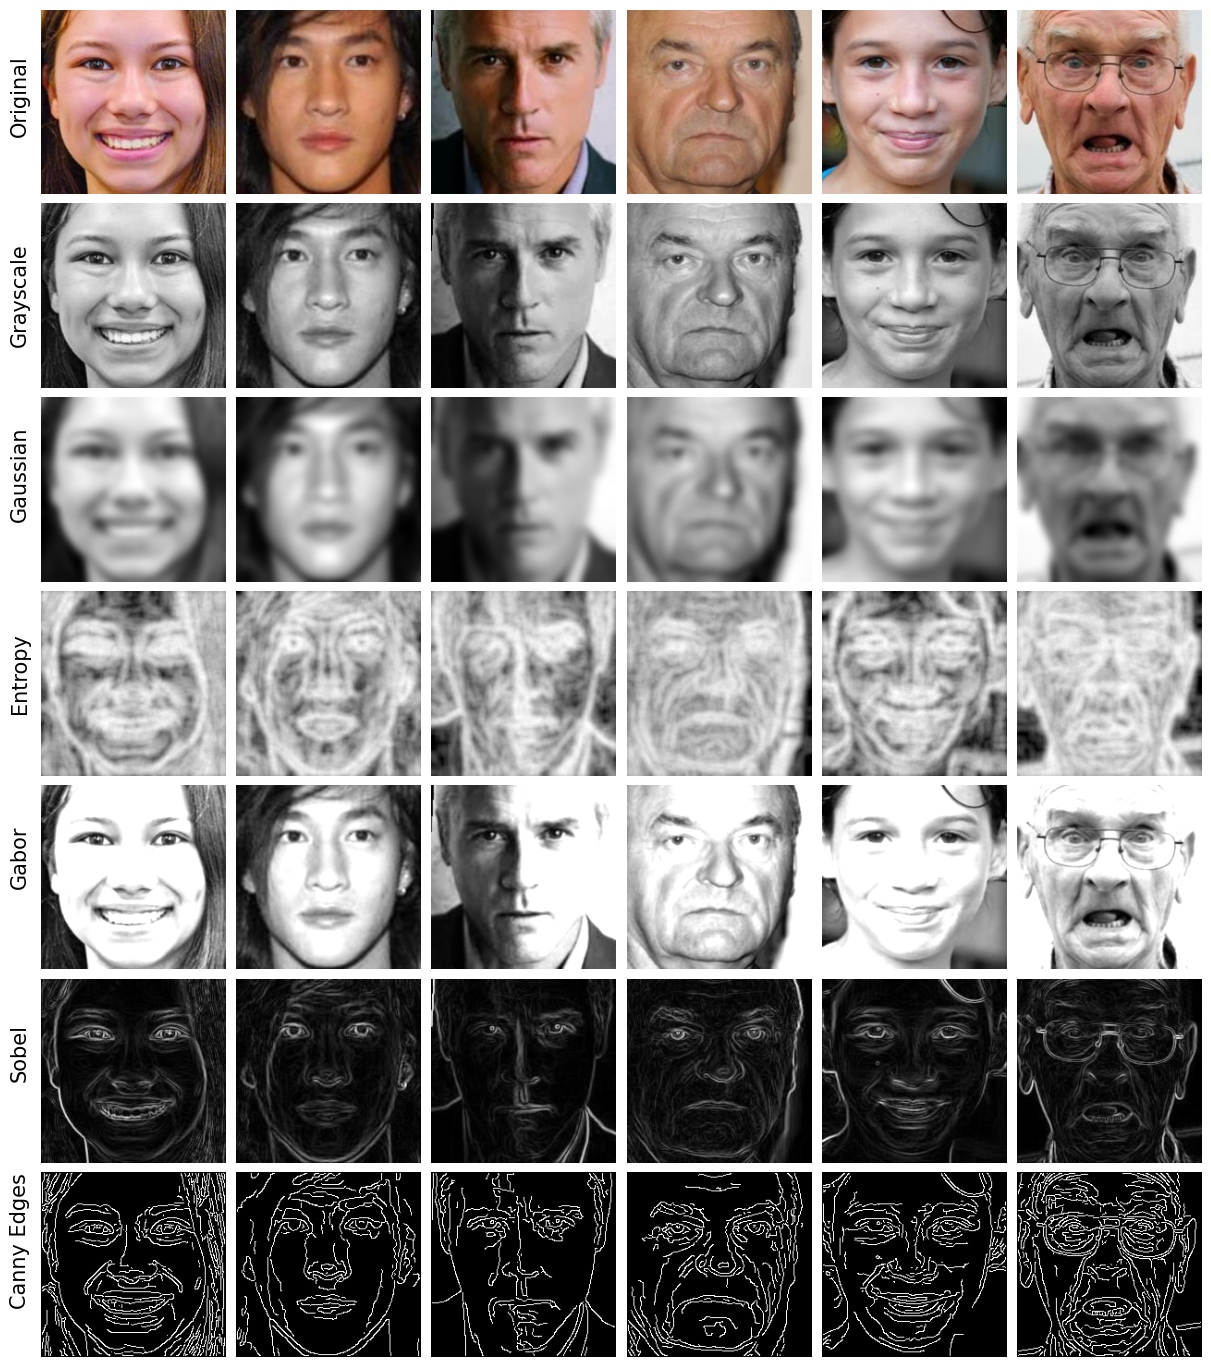

In [13]:
# Applying filters to images

sample_images_path = "./ds"

sample_images = os.listdir(sample_images_path)

n_images = len(sample_images)

fig, ax = plt.subplots(nrows=7, ncols=n_images, figsize=(n_images*2.5, 17.5))
plt.gray()

ax= ax.ravel()

for i, img in enumerate(sample_images):
    
    img_path = os.path.join(sample_images_path, img)
    
    col_img = give_col_image(img_path)
    ax[i].imshow(col_img)
    ax[i].axis('off')
    
    gray_img = give_gray_image(col_img)
    ax[i+(n_images*1)].imshow(gray_img)
    ax[i+(n_images*1)].axis('off')
    
    gaussian_img = give_gaussian_image(gray_img)
    ax[i+(n_images*2)].imshow(gaussian_img)
    ax[i+(n_images*2)].axis('off')
    
    entropy_img = give_entropy_image(gray_img)
    ax[i+(n_images*3)].imshow(entropy_img)
    ax[i+(n_images*3)].axis('off')
    
    gabor_img = give_gabor_image(gray_img)
    ax[i+(n_images*4)].imshow(gabor_img)
    ax[i+(n_images*4)].axis('off')
    
    sobel_img = give_sobel_image(gray_img)
    ax[i+(n_images*5)].imshow(sobel_img)
    ax[i+(n_images*5)].axis('off')
    
    canny_img = give_canny_image(gray_img)
    ax[i+(n_images*6)].imshow(canny_img)
    ax[i+(n_images*6)].axis('off')
    
plt.subplots_adjust(hspace=0.05, wspace=0.05)

plt.figtext(x=0.105, y=0.81, s="Original", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.69, s="Grayscale", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.59, s="Gaussian", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.48, s="Entropy", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.38, s="Gabor", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.27, s="Sobel", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.14, s="Canny Edges", fontsize=15, rotation=90)
    

4) Histograms

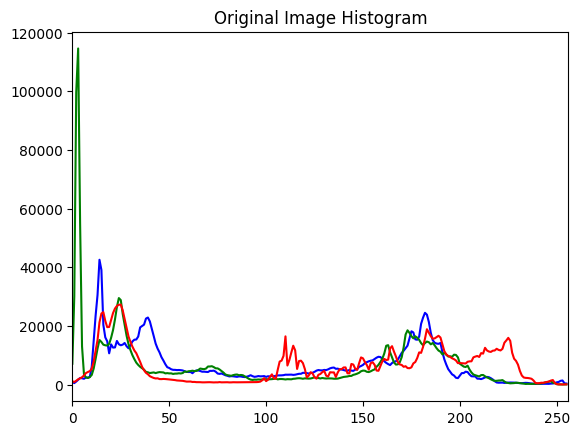

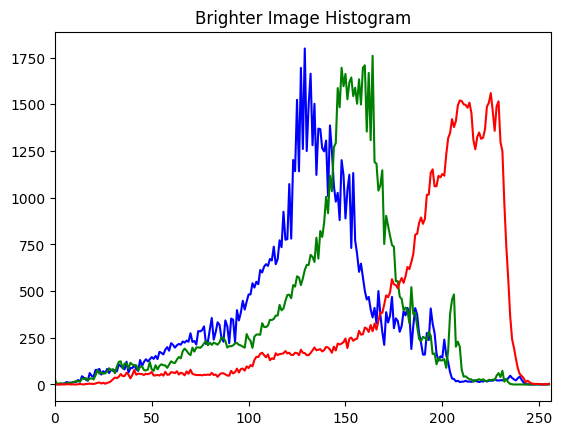

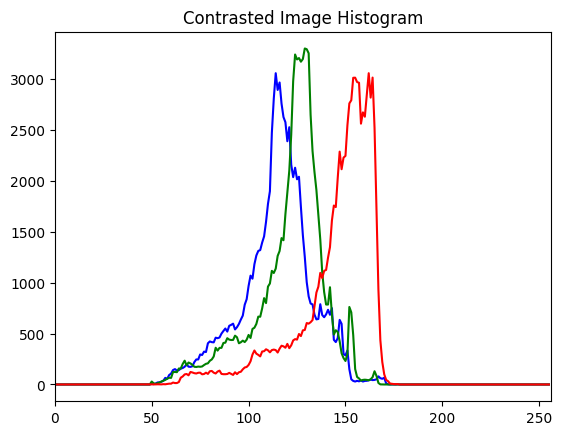

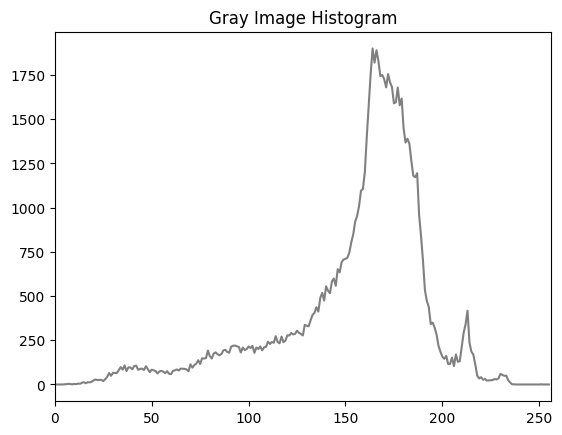

In [2]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces(image_path):
    img = cv.imread(image_path)
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return img, faces
def apply_brightness(image, factor):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    hsv[:,:,2] = np.clip(hsv[:,:,2] * factor, 0, 255)
    return cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

def apply_contrast(image, alpha, beta):
    return np.clip(alpha * image + beta, 0, 255).astype(np.uint8)

def apply_gray(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

def generate_histogram(image, title):
    if len(image.shape) == 3:
        colors = ('b', 'g', 'r')
        for i, color in enumerate(colors):
            hist = cv.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=color)
            plt.xlim([0, 256])
    else: 
        hist = cv.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='gray')
        plt.xlim([0, 256])

    plt.title(title)
    plt.show()

image_path = r'C:\Users\Bartus\Desktop/duda.jpg'
original_image = cv.imread(image_path)
detected_image, faces = detect_faces(image_path)
# przejdz po wzsysktich twarzach jeszcze trzeba na razie tak testowo po jednej tylo
x, y, w, h = faces[0]
face_region = original_image[y:y+h, x:x+w]

brightness_factor = 1
contrast_alpha = 0.5
contrast_beta = 50

brighter_image = apply_brightness(face_region.copy(), brightness_factor)
contrasted_image = apply_contrast(face_region.copy(), contrast_alpha, contrast_beta)
gray_image = apply_gray(face_region.copy())

generate_histogram(original_image, 'Original Image Histogram')
generate_histogram(brighter_image, 'Brighter Image Histogram')
generate_histogram(contrasted_image, 'Contrasted Image Histogram')
generate_histogram(gray_image, 'Gray Image Histogram')

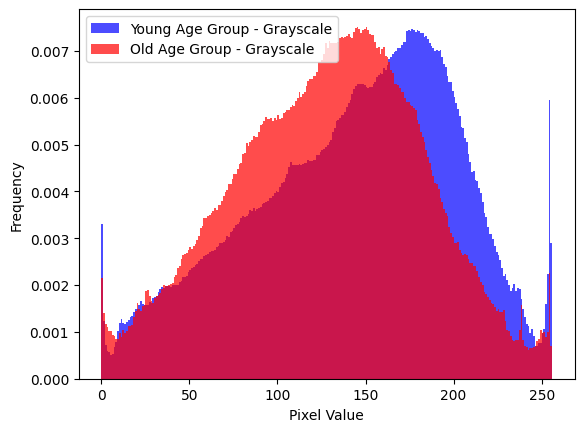

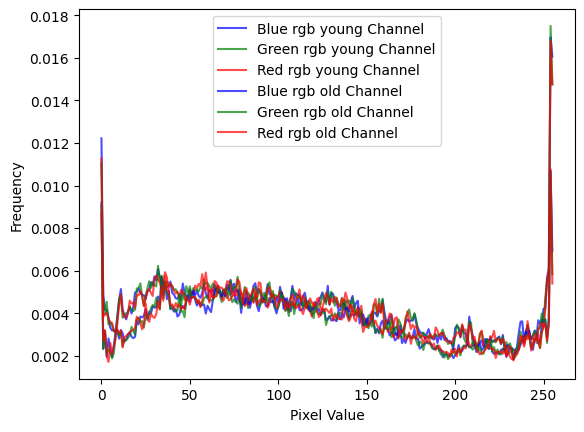

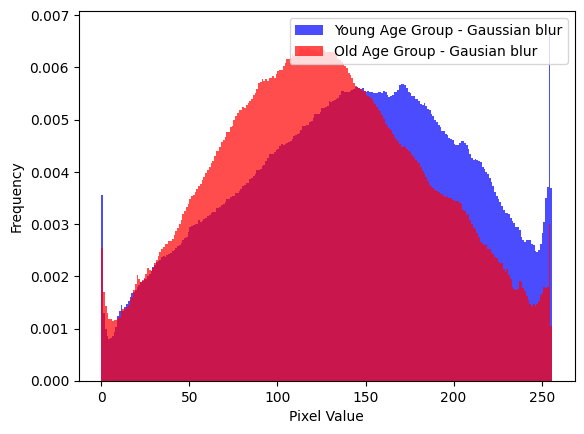

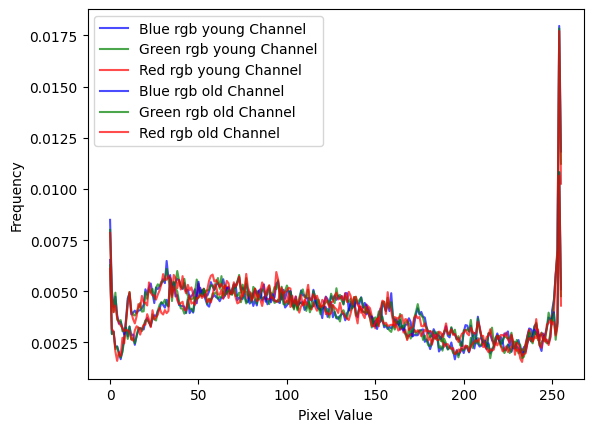

In [4]:
def read_images(directory, age_range, max_images=100):
    images = []
    images_count = 0
    for filename in os.listdir(directory):
        if filename.endswith(".jpg.chip.jpg"):
            age_str = filename.split('_')[0]  # Znajdź fragment z wiekiem
            age = int(''.join(filter(str.isdigit, age_str)))  # Wyodrębnij cyfry z fragmentu
            if age_range[0] <= age <= age_range[1] and images_count < max_images:
                img_path = os.path.join(directory, filename)
                img = cv.imread(img_path)
                images.append(img)
                images_count += 1
    return images

def plot_histogram(images, title, colors, channels=None):
    
    if channels is not None:
        for i, color in enumerate(colors):
            histogram_values, bin_edges = np.histogram(images[:, :, i].ravel(), bins=256, range=[0, 256], density=True)
            plt.plot(bin_edges[0:-1], histogram_values, color=color, alpha=0.7, label=f'{channels[i]} Channel')
    else:
        images_array = np.array(images)
        plt.hist(images_array.ravel(), bins=256, range=[0, 256], color=colors, alpha=0.7, label=title, density=True)

    

def process_images(images):
    processed_images = []
    for img in images:
        # Tutaj możesz dodać dowolne modyfikacje, na przykład konwersję na odcienie szarości.
        
        gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        processed_images.append(gray_img)
    return processed_images

def process_images_gauss(images):
    processed_images = []
    for img in images:
        # Tutaj możesz dodać dowolne modyfikacje, na przykład konwersję na odcienie szarości.
        
        processed_images.append(cv.GaussianBlur(img,(5,5),0))
    return processed_images

# Ścieżka do folderu ze zdjęciami
image_directory = "C:\\Users\\Bartus\\Desktop\\UTKFace"

# Zakres wieku dla dwóch grup
young_age_range = (10, 35)
old_age_range = (60, 100)

# Odczytaj i przetwórz zdjęcia
young_images = read_images(image_directory, young_age_range, max_images=200)
old_images = read_images(image_directory, old_age_range, max_images=200)

# Przetwórz obrazy (np. na odcienie szarości)
young_processed_images = process_images(young_images)
old_processed_images = process_images(old_images)
young_processed_images_gauss = process_images_gauss(young_images)
old_processed_images_gauss = process_images_gauss(old_images)


# Utwórz histogramy dla odcieni szarości
plot_histogram(young_processed_images, 'Young Age Group - Grayscale', 'blue')
plot_histogram(old_processed_images, 'Old Age Group - Grayscale', 'red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# Utwórz histogramy dla kanałów RGB
plot_histogram(np.array(young_images), 'Young Age Group - RGB', ['blue', 'green', 'red'], channels=['Blue rgb young', 'Green rgb young', 'Red rgb young'])
plot_histogram(np.array(old_images), 'Old Age Group - RGB', ['blue', 'green', 'red'], channels=['Blue rgb old', 'Green rgb old', 'Red rgb old'])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# Utwórz histogramy dla gausowskiego blur
plot_histogram(young_processed_images_gauss, 'Young Age Group - Gaussian blur', 'blue')
plot_histogram(old_processed_images_gauss, 'Old Age Group - Gausian blur', 'red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# Utwórz histogramy dla kanałów RGB
plot_histogram(np.array(young_processed_images_gauss), 'Young Age Group Gaussian blur - RGB', ['blue', 'green', 'red'], channels=['Blue rgb young', 'Green rgb young', 'Red rgb young'])
plot_histogram(np.array(old_processed_images_gauss), 'Old Age Group Gaustian blur - RGB', ['blue', 'green', 'red'], channels=['Blue rgb old', 'Green rgb old', 'Red rgb old'])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [3]:
# Drawing a histogram for canny edges filter

def countInSquares(edge_img):
    squareSize = 10
    squareCount = edge_img.shape[0] // squareSize
    result = [0 for _ in range(squareCount * squareCount)]
    for i in range(squareCount):
        for j in range(squareCount):
            for x in range(squareSize):
                for y in range(squareSize):
                    absoluteX = x + i * squareSize
                    absoluteY = y + j * squareSize
                    if edge_img[absoluteX, absoluteY] == 255:
                        result[i + j * squareCount] += 1
    return result


def calculateMeanForEachSquare(filelist):
    result = [0 for _ in range(20 * 20)]
    total = 0
    for filepath in filelist:
        grey_img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
        edge_img = cv.Canny(grey_img, 100, 200)
        white_pixels = countInSquares(edge_img)
        for i in range(len(result)):
            result[i] += white_pixels[i]
        total += 1
        
        # if total % 100 == 0:
        #     print(total)
    maxVal = max(result)
    minVal = min(result) 

    for i in range(len(result)):
        result[i] = result[i] / ((maxVal-minVal) * total)
        

    return result

def calculateMeanForEachSquareForImages(filelist):
    results = []
    for filepath in filelist:
        result = [0 for _ in range(20 * 20)]
        total = 0
        grey_img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
        grey_img = cv.resize(grey_img, (200, 200))
        edge_img = cv.Canny(grey_img, 100, 200)
        white_pixels = countInSquares(edge_img)
        for i in range(len(result)):
            result[i] += white_pixels[i]
        total += 1

        maxVal = max(result)
        minVal = min(result)

        for i in range(len(result)):
            result[i] = result[i] / max((maxVal - minVal) * total, total)  # Division by zero

        results.append(result)

    return results

def calculateMeanForEachSquareForImagesConc(filelist):
    results = []
    for filepath in filelist:
        result = [0 for _ in range(20 * 20)]
        total = 0
        original_image = cv.imread(filepath, cv.IMREAD_GRAYSCALE)  
        grey_img = cv.resize(original_image, (200, 200))
        edge_img = cv.Canny(grey_img, 100, 200)
        result_img = cv.hconcat([original_image, edge_img])
        white_pixels = countInSquares(result_img)
        for i in range(len(result)):
            result[i] += white_pixels[i]
        total += 1
        maxVal = max(result)
        minVal = min(result) 

        for i in range(len(result)):
            result[i] = result[i] / (max((maxVal-minVal) * total, total))
        results.append(result)
        
    return results

def norm(data):
    return (data)/(max(data)-min(data))

def drawBarChartForWhitePixels(dirIn):
    young = []
    old = []

    for filename in os.listdir(dirIn):
        age = int(filename.split('_')[0])
        if 10 <= age <= 15:
            young.append(dirIn + "/" + filename)
        elif age >= 79:
            old.append(dirIn + "/" + filename)

    #print("to calculate young: " + str(len(young)))
    #print("to calculate old: " + str(len(old)))

    # plt.subplot(121).bar([i for i in range(400)], (calculateMeanForEachSquare(young)))
    # plt.title("Young")
    # plt.subplot(122).bar([i for i in range(400)], (calculateMeanForEachSquare(old)))
    # plt.title("Old")
    # plt.figure()
    
    # plt.subplot(121).bar([i for i in range(400)], (calculateMeanForEachSquareConcatenateImages(young)))
    # plt.title("Young")
    # plt.subplot(122).bar([i for i in range(400)], (calculateMeanForEachSquareConcatenateImages(old)))
    # plt.title("Old")
    # plt.show()
    

if __name__ == "__main__":
    drawBarChartForWhitePixels(r'C:\Users\Bartus\Desktop\UTKFace')

6) Decision Tree and CNN

Create test and train dataset

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
# Load and preprocess images
dirIn = r'C:\Users\Bartus\Desktop\UTKFace'
young = []
old = []

for filename in os.listdir(dirIn):
    age = int(filename.split('_')[0])
    if 8 <= age <= 15 and len(young) < 800:
        young.append(dirIn + "/" + filename)
    elif age >= 76 and len(old) < 800:
        old.append(dirIn + "/" + filename)


print(len(young), len(old))
young_squares = calculateMeanForEachSquareForImages(young)
old_squares = calculateMeanForEachSquareForImages(old)

young_squares_age = [int(i.split('_')[0].split('/')[1]) for i in young]
old_squares_age = [int(i.split('_')[0].split('/')[1]) for i in old]
X = young_squares + old_squares
# Reshape data to match the input shape of the model
X = np.array(X).reshape(-1, 20, 20, 1)


Y = np.concatenate((young_squares_age, old_squares_age), axis=None)

# Split the data
train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

800 800


NameError: name 'calculateMeanForEachSquareForImages' is not defined

Test the best max depth value

In [20]:
max_depth_values = list(range(1, 400))
accuracy_values = []

# Iteruj po różnych wartościach max_depth
for max_depth in max_depth_values:
    # Inicjalizuj model drzewa decyzyjnego
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)

    # Trenuj model na danych treningowych
    clf.fit(X_train, y_train)

    # Dokładność modelu na danych testowych
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Narysuj wykres
plt.plot(max_depth_values, accuracy_values, marker='o')
plt.title('Dokładność w zależności od max_depth')
plt.xlabel('max_depth')
plt.ylabel('Dokładność')
plt.show()

KeyboardInterrupt: 

Initialize tree and train model

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Test accuracy on test data

In [22]:
# Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.55


In [95]:
def process_single_image(image_path):
    result = [0 for _ in range(20 * 20)]
    total = 0
    grey_img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    edge_img = cv.Canny(grey_img, 100, 200)
    white_pixels = countInSquares(edge_img)
    for i in range(len(result)):
        result[i] += white_pixels[i]
    total += 1
    maxVal = max(result)
    minVal = min(result) 

    for i in range(len(result)):
        result[i] = result[i] / (max((maxVal-minVal) * total, total))
    return result

def predict_age(model, image_path):
    processed_image = process_single_image(image_path)
    prediction = model.predict([processed_image])
    return prediction[0]

young16 = [ r"C:\Users\Bartus\Desktop\harry.jpg" ]

for image_path in young16:
    predicted_age_young = predict_age(clf, image_path)
    print(predicted_age_young)



NameError: name 'clf' is not defined

CNN method

In [3]:
def extract_age(filename):
    return int(filename.split('_')[0].split('\\')[-1])

In [4]:
def check_which_group_age(age):
    if 1 <= age <= 2:
        return 0
    elif 3 <= age <= 10:
        return 1
    elif 11 <= age <= 20:
        return 2
    elif 21 <= age <= 30:
        return 3
    elif 31 <= age <= 45:
        return 4
    elif 46 <= age <= 60:
        return 5
    else:
        return 6

Create dataset

In [5]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint


def preprocess_image(filelist, max_images_per_group=50):
    images = []
    labels = []
    group_to_filepaths = {}  # Dictionary to hold file paths for each age group

    # Group the file paths by age group
    for filepath in filelist:
        age = extract_age(filepath)
        if age > 80:
            age = 80
        age_group = check_which_group_age(age)
        if age_group not in group_to_filepaths:
            group_to_filepaths[age_group] = []
        group_to_filepaths[age_group].append(filepath)

    # Shuffle and truncate lists of file paths for each age group
    for group, paths in group_to_filepaths.items():
        random.shuffle(paths)
        group_to_filepaths[group] = paths[:max_images_per_group]
    
    for i in group_to_filepaths.keys():
        print(len(group_to_filepaths[i]))
    # Process the images
    for group, paths in group_to_filepaths.items():
        for filepath in paths:
            age = extract_age(filepath)
            if age > 80:
                age = 80
            img_org = cv.imread(filepath)

            # Convert the image to grayscale
            gray = cv.cvtColor(img_org, cv.COLOR_RGB2GRAY)

            # Apply Canny edge detection to find edges
            edges = cv.Canny(gray, 100, 200)

            # Perform dilation to thicken the edges
            kernel = np.ones((3, 3), np.uint8)
            thick_edges = cv.dilate(edges, kernel, iterations=2) 
            img_combined = cv.addWeighted(img_org, 0.7, cv.cvtColor(thick_edges, cv.COLOR_GRAY2RGB), 0.3, 0)
            img_combined = cv.resize(img_combined, (200, 200)) 
            img_combined = img_combined.astype(np.float32) / 255.0 

            images.append(img_combined)
            labels.append(age)
    
    return np.array(images), np.array(labels)

# Load and preprocess images
dirIn = r'C:\Users\Bartus\Desktop\UTKFace'
all_files = [os.path.join(dirIn, filename) for filename in os.listdir(dirIn)]
X, Y = preprocess_image(all_files, 1600)
print(len(X), len(Y))


1600
1600
1600
1600
1600
1600
1600
11200 11200


In [6]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Augmentation data

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create an ImageDataGenerator with data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,   
    width_shift_range=0.05,
    height_shift_range=0.05,
    fill_mode='nearest',
    cval = 0
)

Compile and define CNN model

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(200, 200, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.45),

    Dense(256, activation='relu'),
    Dropout(0.35),

    Dense(1, activation='linear')
])


# Kompilacja modelu
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Podsumowanie modelu
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 25, 25, 64)      

Train model

In [37]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

model_checkpoint_path = "best_model12.h5"

model_checkpoint_callback = ModelCheckpoint(
    filepath=model_checkpoint_path,
    save_best_only=True,
    monitor='val_loss', 
    mode='min', 
    verbose=1
)


history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_val, y_val),
    epochs=40,
    verbose=1,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/40
315/315 [==============================] - ETA: 0s - loss: 603.8828 - mae: 20.3213
Epoch 1: val_loss improved from inf to 525.47070, saving model to best_model12.h5
315/315 [==============================] - 157s 494ms/step - loss: 603.8828 - mae: 20.3213 - val_loss: 525.4707 - val_mae: 17.1049
Epoch 2/40
315/315 [==============================] - ETA: 0s - loss: 401.1880 - mae: 15.8183
Epoch 2: val_loss improved from 525.47070 to 293.04999, saving model to best_model12.h5
315/315 [==============================] - 149s 472ms/step - loss: 401.1880 - mae: 15.8183 - val_loss: 293.0500 - val_mae: 14.1942
Epoch 3/40
315/315 [==============================] - ETA: 0s - loss: 302.8218 - mae: 13.3357
Epoch 3: val_loss improved from 293.04999 to 218.40724, saving model to best_model12.h5
315/315 [==============================] - 150s 476ms/step - loss: 302.8218 - mae: 13.3357 - val_loss: 218.4072 - val_mae: 11.4078
Epoch 4/40
315/315 [==============================] - ETA: 0s - los

Evaluation of age recognition on test set

In [27]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

# Load the best saved model
best_model = load_model('best_model11.h5')

# Evaluate the best model on the test set
test_loss, test_mae = best_model.evaluate(X_test, y_test)

# Predict using the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate additional metrics
test_rmse = calculate_rmse(y_test, y_pred)
test_mape = calculate_mape(y_test, y_pred)

print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test MAPE:", test_mape)


18/18 [==============================] - 2s 81ms/step
Test Loss (MSE): 51.93343734741211
Test MAE: 5.091335296630859
Test RMSE: 7.206485629247558
Test MAPE: 0.41539701326257167


Function to process face

In [9]:
def preprocess_face_image(face_img):
    # Convert the image to grayscale
    gray = cv.cvtColor(face_img, cv.COLOR_RGB2GRAY)

    # Apply Canny edge detection to find edges
    edges = cv.Canny(gray, 100, 200)

    # Perform dilation to thicken the edges
    kernel = np.ones((3, 3), np.uint8)
    thick_edges = cv.dilate(edges, kernel, iterations=2) 
    img_combined = cv.addWeighted(face_img, 0.7, cv.cvtColor(thick_edges, cv.COLOR_GRAY2RGB), 0.3, 0)
    img_combined = cv.resize(img_combined, (200, 200))
    img_combined = img_combined.astype(np.float32) / 255.0 

    return img_combined

Process one photo

[[592 137 298 298]]
1/1 [==============================] - 0s 92ms/step
[[46.480137]] (200, 200, 3)


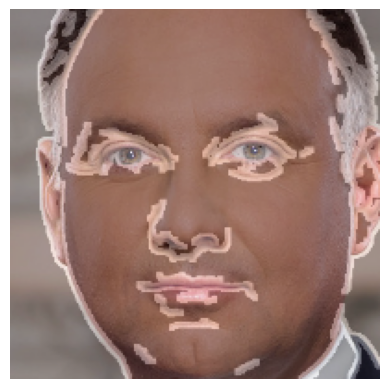

In [15]:

example_image_path = r"C:\Users\Bartus\Desktop\duda.jpg"

img_org = cv.imread(example_image_path)
best_model = load_model('best_model11.h5')

# Detect faces
_, faces = detect_faces(example_image_path)

# Check if any faces are detected
print(faces)
if faces.any():
    # Process each detected face
    for face in faces:
        # Extract the face rectangle
        x, y, w, h = face
        face_rectangle = img_org[y:y+h, x:x+w]

        # Preprocess the face image
        preprocessed_face = preprocess_face_image(face_rectangle)

        # Make predictions using the model
        predicted_age = best_model.predict(np.expand_dims(preprocessed_face, axis=0))  # Add batch dimension
        print(predicted_age, preprocessed_face.shape)

        # Display the preprocessed face
        plt.imshow(cv.cvtColor(preprocessed_face, cv.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
else:
    preprocessed_face = preprocess_face_image(img_org)

    # Make predictions using the model
    predicted_age = best_model.predict(np.expand_dims(preprocessed_face, axis=0))  # Add batch dimension
    print(predicted_age, preprocessed_face.shape)

    # Display the preprocessed face
    plt.imshow(cv.cvtColor(preprocessed_face, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


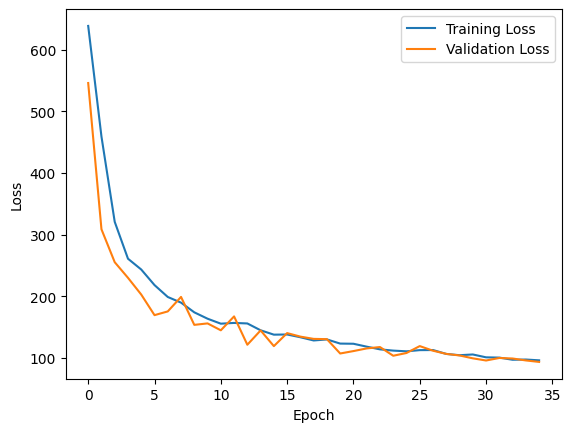

In [72]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluation of face recognition 

In [ ]:
import csv
input_dir_faces_evaluation = r"C:\Users\Bartus\Desktop\faces_evaluation\train\image_data"
csv_file_path = r"C:\Users\Bartus\Desktop\faces_evaluation\train\train.csv"
csv_data = {}
avg_error = 0.0
good_img = 0
predicted_faces = 0
proper_faces = 0
with open(csv_file_path) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    next(csvreader)
    for row in csvreader:
        if row:
            csv_data[row[0]] = int(row[1])
for filename in os.listdir(input_dir_faces_evaluation):
    if filename.endswith(".jpg"):
        image_path = os.path.join(input_dir_faces_evaluation, filename)
        _, detected_faces = detect_faces(image_path)
        if filename in csv_data:
            good_img = good_img + 1
            expected_faces = csv_data[filename]
            avg_error = avg_error + abs(len(detected_faces) - expected_faces)   
            predicted_faces = predicted_faces + len(detected_faces)
            proper_faces = proper_faces + expected_faces

In [ ]:
print("sredni blad:" + str(avg_error / good_img))
print("w sumie bledu: " + str(avg_error))
print("powinno byc: " + str(proper_faces))
print("bylo: " + str(predicted_faces))
print("procentowo: " + str(100 * predicted_faces / proper_faces))

In [ ]:
input_dir_animal_evaluation = r"C:\Users\Bartus\Desktop\faces_evaluation\animals"
detected = 0
k = 0
for subdir in os.listdir(input_dir_animal_evaluation):
    subdir_path = os.path.join(input_dir_animal_evaluation, subdir)
    k = k + 1
    if k % 10 == 0:
        print(k)
    # Check if it's a directory
    if os.path.isdir(subdir_path):
        for filename in os.listdir(subdir_path):
            if filename.endswith(".jpg"):
                image_path = os.path.join(subdir_path, filename)
                _, detected_faces = detect_faces(image_path)
                detected += len(detected_faces)

print("wykrylo: " + str(detected))

5) Example of augmentation of faces

Text(0.762, 0.09, 'Rotated -40deg')

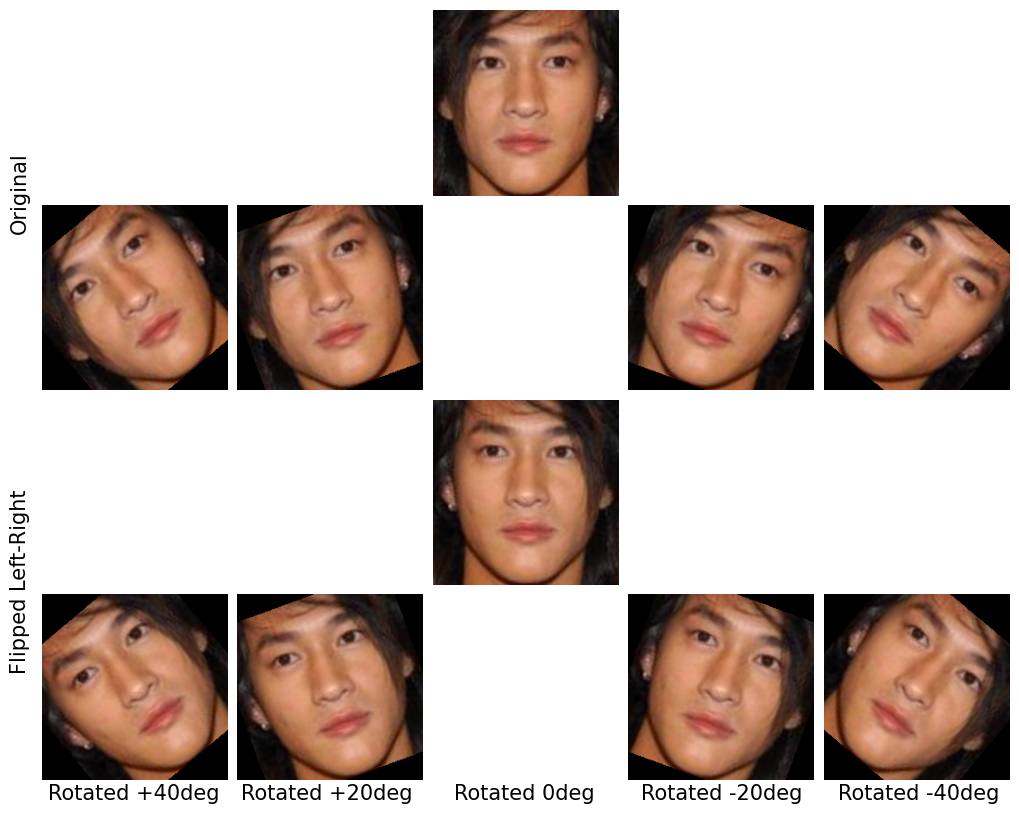

In [23]:
# Augmenting the image and plotting the augmented images

img_path = "./ds/24_0_2_20161219192221394.jpg.chip.jpg"

img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)

fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(12.5, 10))
plt.subplots_adjust(hspace=0.05, wspace=0.05)

ax= ax.ravel()
for i in range(20):
    ax[i].axis('off')

# Original image.
ax[2].imshow(img)

# Augmented image: original image with 40deg rotation.
img_rot_pos40 = ndimage.rotate(img, 40, reshape=False)
ax[5].imshow(img_rot_pos40)

# Augmented image: original image with 20deg rotation.
img_rot_pos20 = ndimage.rotate(img, 20, reshape=False)
ax[6].imshow(img_rot_pos20)

# Augmented image: original image with -20deg rotation.
img_rot_neg20 = ndimage.rotate(img, -20, reshape=False)
ax[8].imshow(img_rot_neg20)

# Augmented image: original image with -40deg rotation.
img_rot_neg40 = ndimage.rotate(img, -40, reshape=False)
ax[9].imshow(img_rot_neg40)

# Augmented image: original image flipped laterally.
img_fliplr = np.fliplr(img)
ax[12].imshow(img_fliplr)

# Augmented image: flipped image with 40deg rotation.
img_fliplr_rot_pos40 = ndimage.rotate(img_fliplr, 40, reshape=False)
ax[15].imshow(img_fliplr_rot_pos40)

# Augmented image: flipped image with 20deg rotation.
img_fliplr_rot_pos20 = ndimage.rotate(img_fliplr, 20, reshape=False)
ax[16].imshow(img_fliplr_rot_pos20)

# Augmented image: flipped image with -20deg rotation.
img_fliplr_rot_neg20 = ndimage.rotate(img_fliplr, -20, reshape=False)
ax[18].imshow(img_fliplr_rot_neg20)

# Augmented image: flipped image with -40deg rotation.
img_fliplr_rot_neg40 = ndimage.rotate(img_fliplr, -40, reshape=False)
ax[19].imshow(img_fliplr_rot_neg40)

plt.figtext(x=0.1, y=0.66, s="Original", fontsize=15, rotation=90)
plt.figtext(x=0.1, y=0.22, s="Flipped Left-Right", fontsize=15, rotation=90)
plt.figtext(x=0.13, y=0.09, s="Rotated +40deg", fontsize=15)
plt.figtext(x=0.285, y=0.09, s="Rotated +20deg", fontsize=15)
plt.figtext(x=0.455, y=0.09, s="Rotated 0deg", fontsize=15)
plt.figtext(x=0.605, y=0.09, s="Rotated -20deg", fontsize=15)
plt.figtext(x=0.762, y=0.09, s="Rotated -40deg", fontsize=15)